<h2> <center><font color="#0099cc"> Keras model (linear regression)


In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD

Using TensorFlow backend.


In [0]:
df = pd.read_csv('/content/drive/My Drive/Google Colab/Neural Network/Keras/My_Code_Keras/weight-height.csv')
x = df[['Height']].values
y = df[['Weight']].values
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [0]:
model = Sequential()
# Layer # Dense = 1 means y_change as out /output = activation(dot(input, kernel) + bias) 
model.add(Dense(1, input_shape=(1,)))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(Adam(lr=0.8),'mean_squared_error') # Optimizer(learning rate), loss function

In [0]:
model.fit(x, y, epochs=80) # Input data, Target data , num of itteration




Epoch 1/80





10000/10000 [==============================] - 1s 94us/step - loss: 661.9008
Epoch 2/80
10000/10000 [==============================] - 0s 29us/step - loss: 537.7185
Epoch 3/80
10000/10000 [==============================] - 0s 30us/step - loss: 485.0437
Epoch 4/80
10000/10000 [==============================] - 0s 30us/step - loss: 428.2440
Epoch 5/80
10000/10000 [==============================] - 0s 29us/step - loss: 400.9372
Epoch 6/80
10000/10000 [==============================] - 0s 30us/step - loss: 343.3720
Epoch 7/80
10000/10000 [==============================] - 0s 29us/step - loss: 296.7192
Epoch 8/80
10000/10000 [==============================] - 0s 33us/step - loss: 301.0642
Epoch 9/80
10000/10000 [==============================] - 0s 28us/step - loss: 264.3966
Epoch 10/80
10000/10000 [==============================] - 0s 27us/step - loss: 243.2518
Epoch 11/80
10000/10000 [==============================] - 0s 29us/step - loss: 236.0684
Epoch 12/80
10000/1000

In [0]:
y_change = model.predict(x) # Best fit value for x
y_change

array([[218.29596],
       [179.2995 ],
       [220.32153],
       ...,
       [141.46713],
       [181.24225],
       [126.65613]], dtype=float32)

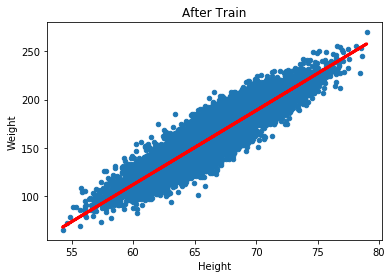

In [0]:
df.plot(kind='scatter',
        x = 'Height',
        y = 'Weight',
        title='After Train')
plt.plot(x , y_change, color='red', linewidth=3)

In [0]:
w, b = model.get_weights() # retrive the weight and bias of the model
print("Adjusted weight ",w)
print("Adjusted bias ",b)

Adjusted weight  [[7.6990347]]
Adjusted bias  [-350.25476]


In [0]:
# Equation of line / Hypothesis
def line_b(x, w, b):
  return x * w + b

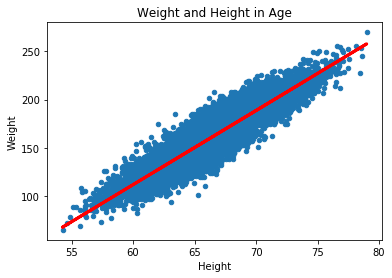

In [0]:
y_change = line_b(x, w, b)
df.plot(kind='scatter',
        x = 'Height',
        y = 'Weight',
        title='Weight and Height in Age')
plt.plot(x , y_change, color='red',linewidth=3)

<h2> <center><font color="#0099cc"> Model Performance (linear regression)<br>Train Test split

In [0]:
df = pd.read_csv('/content/drive/My Drive/Google Colab/Neural Network/Keras/My_Code_Keras/weight-height.csv')
x = df[['Height']].values
y = df[['Weight']].values
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2) # 0.2 = 20% of data is using for test

In [0]:
print("X _ train : ",len(x_train))
print("X _ test : ",len(x_test))

X _ train :  8000
X _ test :  2000


In [0]:
w[0,0] = 0.0
b[0] = 0.0
model.set_weights((w,b))

In [0]:
model.fit(x_train, y_train, epochs=50, verbose=0)

In [0]:
y_train_pred = model.predict(x_train).ravel()
y_test_pred = model.predict(x_test).ravel()

In [0]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2_score

In [0]:
err_train = mse(y_train,y_train_pred)
err_test = mse(y_test, y_test_pred)

In [0]:
print("R2 error on Train :\t{:0.1f}".format(err_train))
print("R2 error on Test :\t{:0.1f}".format(err_test))

R2 error on Train :	150.6
R2 error on Test :	151.7


In [0]:
score_train = r2_score(y_train,y_train_pred)
score_test = r2_score(y_test, y_test_pred)

In [0]:
print("R2 score on Train :\t{:0.1f}".format(score_train))
print("R2 score on Test :\t{:0.1f}".format(score_test))

R2 score on Train :	0.9
R2 score on Test :	0.9


<h2> R2 train == R2 test its means the model is generelized </h2><br>
R2 close to 1 good score.<br>
R2 lower than 1 incresingly worse score.<br>
R2 is 0 or below, model is worse.

In [0]:
# R2 close to 1 good score
# R2 lower than 1 incresingly worse score
# r2 is 0 or below model is worse